In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from definitions import data_source_path, treatment_countries, fig_size, \
show_plots, save_figs, show_output, target_var, country_col, date_col, incl_countries, incl_years, fake_num
from util_general import read_data, get_impl_date, get_trans, get_timescale, get_data_path, get_fig_path, get_table_path, get_model_color, get_formal_country_name, get_formal_title, get_formal_var_name
from plot_functions import plot_corr

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.linear_model import Lasso

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller

In [21]:
timeframe = 'm'
treatment_country = 'ireland'
title = 'act_pred_log_diff'

In [22]:
def get_file(model):
    return f'{model}_{treatment_country}_{timeframe}_{title}'

In [23]:
model = 'lasso'
lasso = read_data(source_path=get_table_path(timeframe=timeframe, folder='results', country=treatment_country, model=model), file_name=get_file(model))
lasso = lasso[['date', 'act', 'pred']].rename(columns={'pred': model})

# lasso
# lasso.plot()

In [24]:
model = 'rf'
rf = read_data(source_path=get_table_path(timeframe=timeframe, folder='results', country=treatment_country, model=model), file_name=get_file(model))
rf = rf[['date', 'act', 'pred']].rename(columns={'pred': model})

# rf
# rf.plot()

In [25]:
model = 'ols'
ols = read_data(source_path=get_table_path(timeframe=timeframe, folder='results', country=treatment_country, model=model), file_name=get_file(model))
ols = ols[['date', 'act', 'pred']].rename(columns={'pred': model})

# ols
# ols.plot()

In [26]:
model = 'sc'
sc = read_data(source_path=get_table_path(timeframe=timeframe, folder='results', country=treatment_country, model=model), file_name=get_file(model))
sc = sc[['date', 'act', 'pred']].rename(columns={'pred': model})

# sc
# sc.plot()

In [27]:
key_cols = ['date', 'act']

total = lasso.copy()
total = pd.merge(left=total, right=ols)
total = pd.merge(left=total, right=rf)
total = pd.merge(left=total, right=sc)

total = total.set_index('date')
total

,act,lasso,ols,rf,sc
date,,,,,
2001-01-01,0.083624,0.045248,0.062899,0.045500,-0.073019
2001-02-01,0.066749,0.030695,0.035831,0.037758,-0.017062
2001-03-01,0.112298,0.037869,0.075768,0.033309,-0.040807
2001-04-01,0.012458,0.018207,-0.000344,-0.008255,0.090582
2001-05-01,0.025783,0.009919,0.008615,0.018535,0.037213
...,...,...,...,...,...
2019-06-01,-0.028505,-0.003032,-0.009934,-0.038593,-0.031865
2019-07-01,-0.024543,-0.017671,-0.030131,-0.025557,-0.031651
2019-08-01,-0.020030,-0.002256,-0.015559,-0.022757,-0.032226


# PRED

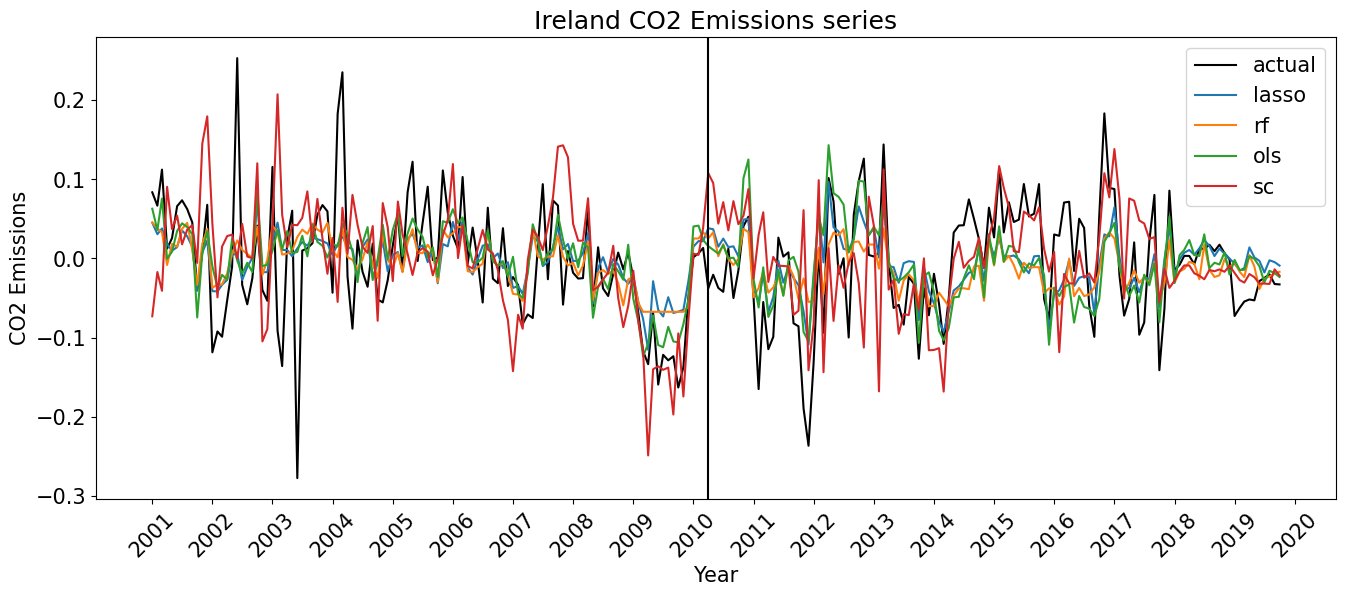

In [28]:
df = total.copy()
var_name = target_var

fig_size = (16,6)

df.index = pd.to_datetime(df.index)

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(df['act'], label='actual', color='black')
for model_alt in ['lasso', 'rf', 'ols', 'sc']:
    ax.plot(df[model_alt], label=model_alt)
ax.axvline(x=get_impl_date(treatment_country, input='dt'), color=get_model_color(type='impl'))

ax.xaxis.set_major_locator(mdates.YearLocator())
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

if treatment_country in treatment_countries:
    ax.set_title(f'{get_formal_country_name(treatment_country)} {get_formal_var_name(var_name=var_name)} series')
else:
    ax.set_title(f'{get_formal_var_name(var_name=var_name)} series')
ax.set_xlabel('Year')
ax.set_ylabel(f'{get_formal_var_name(var_name=var_name)}')
ax.legend(loc='best')

plt.show()

# CUMSUM

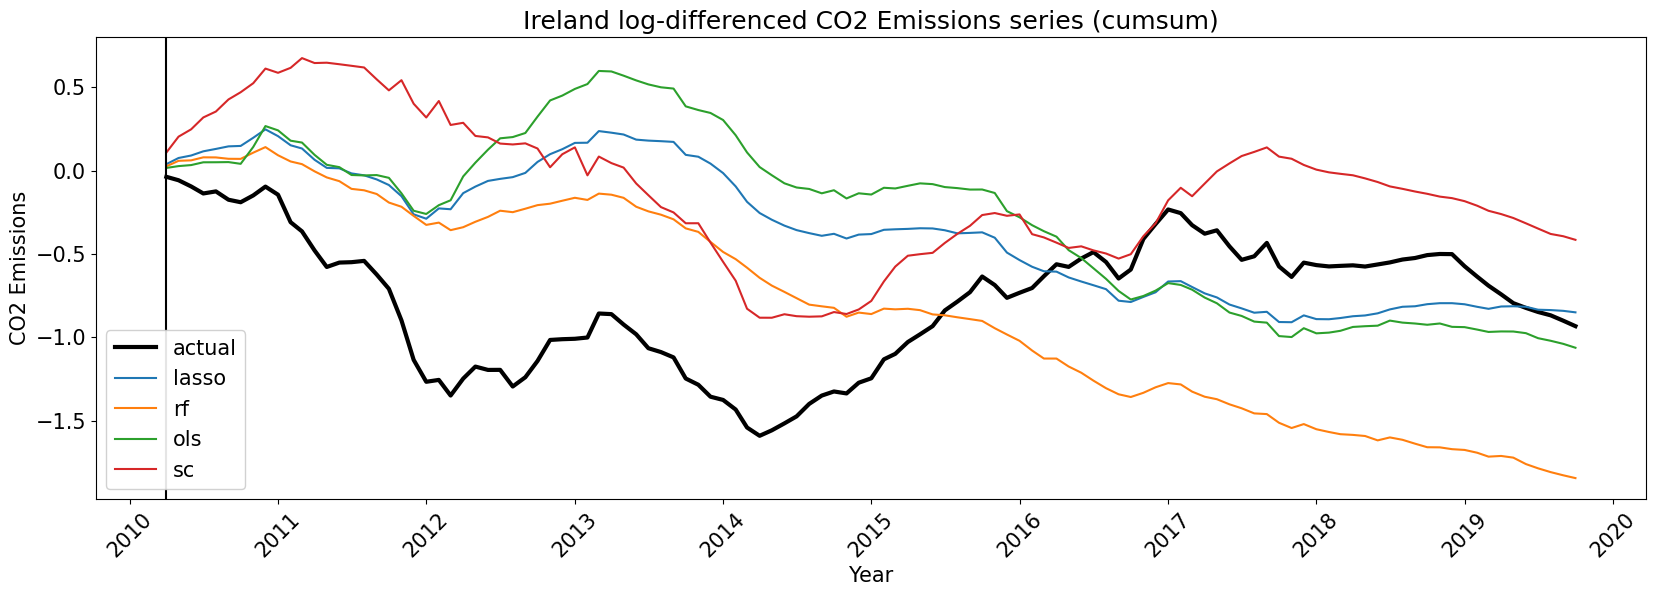

In [29]:
res_path = get_fig_path(timeframe=timeframe,folder='results')

df = total.copy()
var_name = target_var

fig_size = (20,6)

df.index = pd.to_datetime(df.index)
# df = df[df.index >= get_impl_date(treatment_country)]

# fig, ax = plt.subplots(figsize=fig_size)
# ax.plot(df['act'].cumsum(), label='actual', color='black')
# for model_alt in ['lasso', 'rf', 'ols', 'sc']:
#     ax.plot(df[model_alt].cumsum(), label=model_alt)
# # ax.axvline(x=get_impl_date(treatment_country, input='dt'), color=get_model_color('impl'))

# ax.xaxis.set_major_locator(mdates.YearLocator())
# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)

# if treatment_country in country_name_formal.keys():
#     ax.set_title(f'{country_name_formal[treatment_country]} {get_formal_title(var_name=var_name)} CO2 series (cumsum)')
# else:
#     ax.set_title(f'{get_formal_title(var_name=var_name)} CO2 series (cumsum)')
# ax.set_xlabel('Year')
# ax.set_ylabel(f'{get_formal_title(var_name=var_name)} CO2 (cumsum)')
# ax.legend(loc='best')
# plt.show()


df = df[df.index >= get_impl_date(treatment_country)]

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(df['act'].cumsum(), label='actual', color='black', linewidth=3)
for model_alt in ['lasso', 'rf', 'ols', 'sc']:
    ax.plot(df[model_alt].cumsum(), label=model_alt)
ax.axvline(x=get_impl_date(treatment_country, input='dt'), color=get_model_color('impl'))

ax.xaxis.set_major_locator(mdates.YearLocator())
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

if treatment_country in treatment_countries:
    ax.set_title(f'{get_formal_country_name(treatment_country)} {get_formal_title(var_name=title)} {get_formal_var_name(var_name=var_name)} series (cumsum)')
else:
    ax.set_title(f'{get_formal_var_name(var_name=var_name)} series (cumsum)')
ax.set_xlabel('Year')
ax.set_ylabel(f'{get_formal_var_name(var_name=var_name)}')
ax.legend(loc='lower left', framealpha=0.9)

if save_figs:
    plt.savefig(f'{res_path}/arco_{treatment_country}.png', dpi=300, bbox_inches='tight')
if show_plots:
    plt.show()